## Exploring the preferred alternative

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from ema_workbench import (Model, CategoricalParameter, ScalarOutcome, IntegerParameter, RealParameter)
from ema_workbench import (Model, MultiprocessingEvaluator, SequentialEvaluator, Policy, Scenario, Constant)
from dike_model_function import DikeNetwork 

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.util import ema_logging
import time
from problem_formulation import get_model_for_problem_formulation

ema_logging.log_to_stderr(ema_logging.INFO)

#choose problem formulation number, between 0-9
#each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(9)

#Boolean for running model instances
runmodel = False

#Boolean for saving generated images
remakeimages = True

After initializing the packages and loading the model, the Policy for the preferred alternative is implemented:

In [2]:
policies = [
Policy('final', **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 2, 
                    'A.1_DikeIncrease 0': 3, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 2, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 5, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 8, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 2, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})
]

In [3]:
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
from SALib.analyze import sobol

#Running the model with sobol uncertainty sampling
if runmodel:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(scenarios=1000, policies=policies, uncertainty_sampling='sobol')
        experiments, outcomes = results

        outcomes_df = pd.DataFrame(outcomes)
        #Save the results
        experiments.to_excel('./export/final_policy_pf9_experiments.xlsx')
        outcomes_df.to_excel('./export/final_policy_pf9_outcomes.xlsx')

#Load the most recently saved results
experiments = pd.read_excel('./export/final_policy_pf9_experiments.xlsx', index_col=0, )
outcomes_df = pd.read_excel('./export/final_policy_pf9_outcomes.xlsx', index_col=0, )

In [4]:
#Create descriptive statistics for the outcomes
outcomes_statistics = pd.DataFrame()
single_mean = {}
single_std = {}
single_min = {}
single_max = {}
single_90th = {}

for key in outcomes_df.keys(): #loop x times for each key in outcomes
    single_mean[key] = np.mean(outcomes_df[key])
    single_std[key] = np.std(outcomes_df[key])
    single_min[key] = np.min(outcomes_df[key])
    single_max[key] = np.max(outcomes_df[key])
    single_90th[key] = np.percentile(outcomes_df[key],90)
    
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_mean, index = ['mean']))
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_std, index = ['std']))
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_min, index = ['min']))
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_max, index = ['max']))
outcomes_statistics = outcomes_statistics.append(pd.DataFrame(single_90th, index = ['90th']))


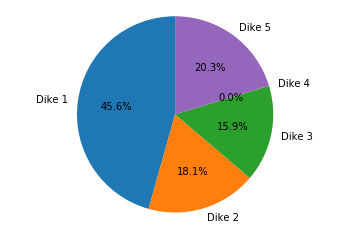

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Dike 1', 'Dike 2', 'Dike 3', 'Dike 4', 'Dike 5'
sizes = [ outcomes_statistics['A.1_Expected Number of Deaths']['mean']*100,
    outcomes_statistics['A.2_Expected Number of Deaths']['mean']*100, 
    outcomes_statistics['A.3_Expected Number of Deaths']['mean']*100, 
    outcomes_statistics['A.4_Expected Number of Deaths']['mean']*100, 
    outcomes_statistics['A.5_Expected Number of Deaths']['mean']*100 ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rc('font', size=16) 
if remakeimages:
    plt.savefig('export/images/pie_deaths.png')
plt.show()

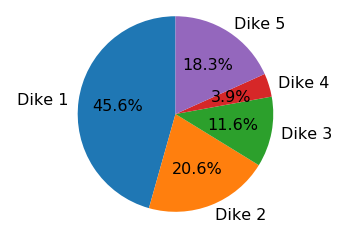

In [6]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Dike 1', 'Dike 2', 'Dike 3', 'Dike 4', 'Dike 5'
sizes = [ outcomes_statistics['A.1 Total Costs']['mean']*100,
    outcomes_statistics['A.2 Total Costs']['mean']*100, 
    outcomes_statistics['A.3 Total Costs']['mean']*100, 
    outcomes_statistics['A.4 Total Costs']['mean']*100, 
    outcomes_statistics['A.5 Total Costs']['mean']*100 ]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rc('font', size=16) 
if remakeimages:
    plt.savefig('export/images/pie_damage.png')
plt.show()

To contextualize the results, we will run a model of the base case to compare the results to. For the base case the statistiscs are calculated as well

In [7]:
#Base case scenario
policies = [ 
    Policy('Base', **{'0_RfR 0': 0, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 0, '1_RfR 1': 0, '1_RfR 2': 0, '2_RfR 0': 0, '2_RfR 1': 0, '2_RfR 2': 0, 
                      '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 2, 
                    'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 0, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 0, 'A.2_DikeIncrease 1': 0, 
                    'A.2_DikeIncrease 2': 0, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 0, 'A.4_DikeIncrease 0': 0, 
                    'A.4_DikeIncrease 1': 0, 'A.4_DikeIncrease 2': 0, 'A.5_DikeIncrease 0': 0, 'A.5_DikeIncrease 1': 0, 'A.5_DikeIncrease 2': 0})
]

if runmodel:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(scenarios=100, policies=policies, uncertainty_sampling='sobol')
    
        experiments_base, outcomes_base = results

        outcomes_base_df = pd.DataFrame(outcomes_base)
        #Save the results
        experiments_base.to_excel('./export/base_case_9_experiments.xlsx')
        outcomes_base_df.to_excel('./export/base_case_9_outcomes.xlsx')

#Load the most recently saved results
experiments_base = pd.read_excel('./export/base_case_9_experiments.xlsx', index_col=0, )
outcomes_base_df = pd.read_excel('./export/base_case_9_outcomes.xlsx', index_col=0, )

In [8]:
#Create descriptive statistics for the outcomes
outcomes_statistics_base = pd.DataFrame()
single_mean = {}
single_std = {}
single_min = {}
single_max = {}
single_90th = {}

for key in outcomes_base_df.keys(): #loop x times for each key in outcomes
    single_mean[key] = np.mean(outcomes_base_df[key])
    single_std[key] = np.std(outcomes_base_df[key])
    single_min[key] = np.min(outcomes_base_df[key])
    single_max[key] = np.max(outcomes_base_df[key])
    single_90th[key] = np.percentile(outcomes_base_df[key],90)
    
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_mean, index = ['mean']))
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_std, index = ['std']))
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_min, index = ['min']))
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_max, index = ['max']))
outcomes_statistics_base = outcomes_statistics_base.append(pd.DataFrame(single_90th, index = ['90th']))

To compare the advised policy and basecase, a parcoords plot is made comparing the mean of both policies

C:\Program Files (x86)\Anaconda\lib\site-packages\ema_workbench\analysis\parcoords.py:198: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


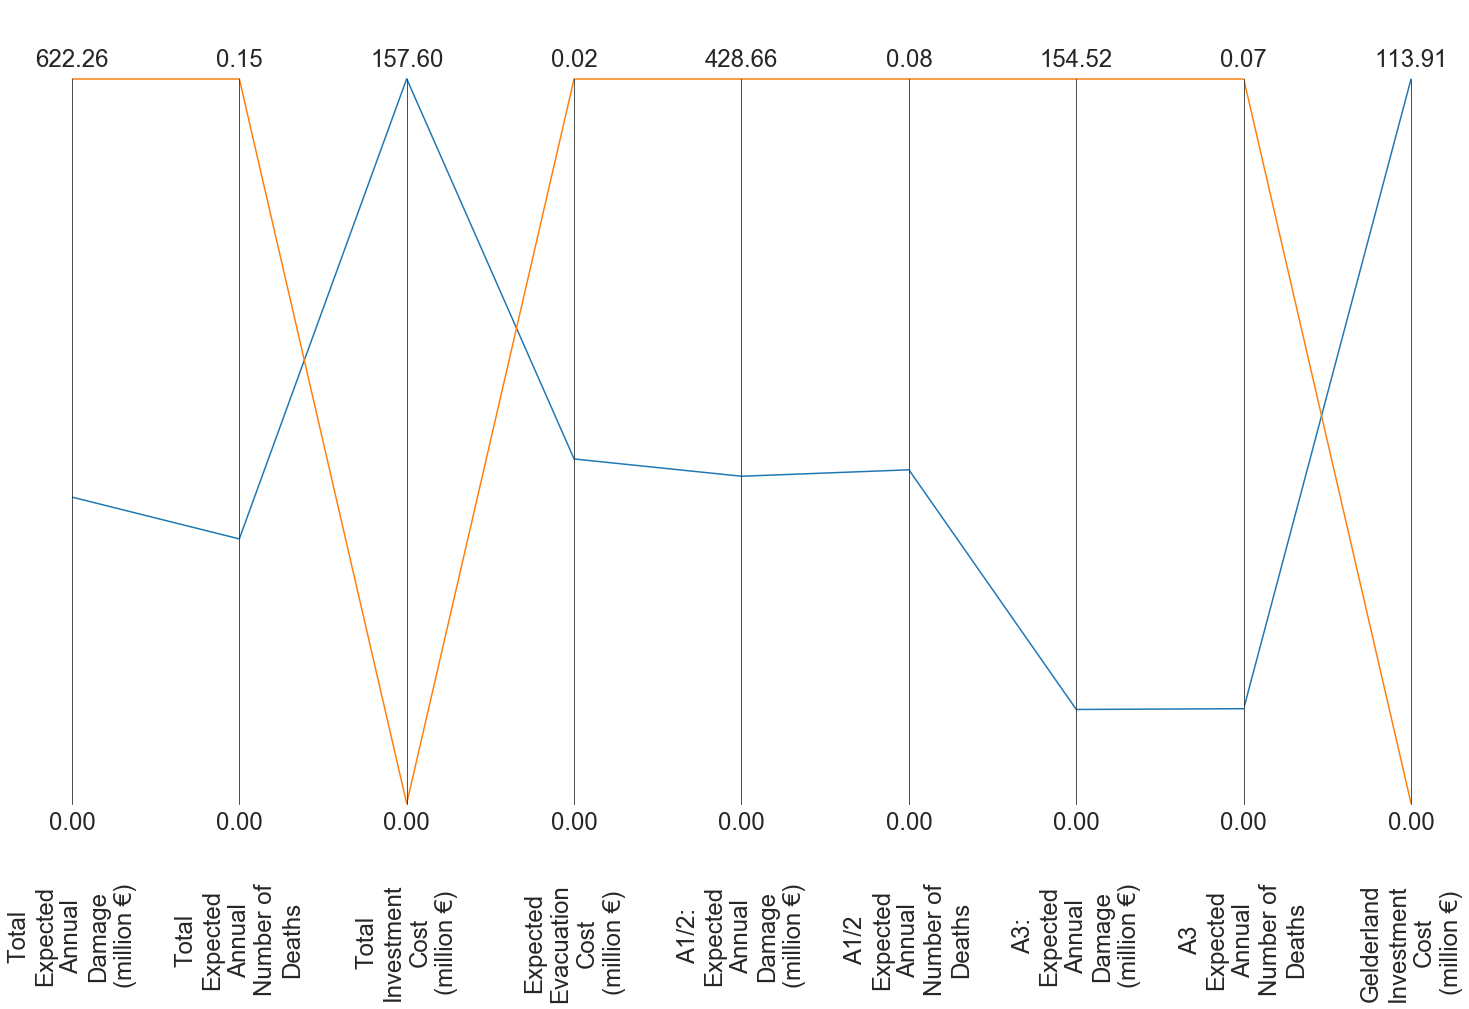

In [9]:
from ema_workbench.analysis import parcoords

parcoords_data = outcomes_statistics.append(outcomes_statistics_base)

#Rename and scale the data for a more pleasant parcoords visualisation
data = parcoords_data.iloc[[0, 5],0:9]
data['EAD'] = data['EAD'].apply(lambda x: x/1000000)
data['TIC'] = data['TIC'].apply(lambda x: x/1000000)
data['A1/2_EAD'] = data['A1/2_EAD'].apply(lambda x: x/1000000)
data['A3_EAD'] = data['A3_EAD'].apply(lambda x: x/1000000)
data['G_TIC'] = data['G_TIC'].apply(lambda x: x/1000000)
data['EEC'] = data['EEC'].apply(lambda x: x/1000000)

data.rename(columns={'EAD': 'Total\nExpected\nAnnual\nDamage\n(million €)',
                     'END': 'Total\nExpected\nAnnual\nNumber of\nDeaths',
                     'TIC':'Total\nInvestment\nCost\n(million €)',
                     'A1/2_EAD':'A1/2:\nExpected\nAnnual\nDamage\n(million €)',
                     'A1/2_END':'A1/2\nExpected\nAnnual\nNumber of\nDeaths',
                     'A3_EAD':'A3:\nExpected\nAnnual\nDamage\n(million €)',
                     'A3_END':'A3\nExpected\nAnnual\nNumber of\nDeaths',
                     'G_TIC':'Gelderland\nInvestment\nCost\n(million €)',
                     'EEC':'Expected\nEvacuation\nCost\n(million €)'}
            , inplace=True)

limits = parcoords.get_limits(data)
limits.loc[0, ['Total\nExpected\nAnnual\nDamage\n(million €)',
               'Total\nExpected\nAnnual\nNumber of\nDeaths',
               'Total\nInvestment\nCost\n(million €)', 
               'Expected\nEvacuation\nCost\n(million €)', 
               'A1/2:\nExpected\nAnnual\nDamage\n(million €)', 
               'A1/2\nExpected\nAnnual\nNumber of\nDeaths', 
               'A3:\nExpected\nAnnual\nDamage\n(million €)', 
               'A3\nExpected\nAnnual\nNumber of\nDeaths', 
               'Gelderland\nInvestment\nCost\n(million €)', ]] = 0

paraxes = parcoords.ParallelAxes(limits, fontsize=24)
paraxes.plot(data)
fig = plt.gcf()
fig.set_size_inches(24,16)
if remakeimages:
    plt.savefig("export/images/parcoords_base_vs_final.png", bbox_inches='tight')
plt.show()

Next, uncertainty exploration is done, starting with running PRIM with the a high expected annual damage and number of deaths as outcome of interest

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 40000 points remaining, containing 3999 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.084, coverage: 0.8402100525131283, density: 1.0 restricted_dimensions: 1


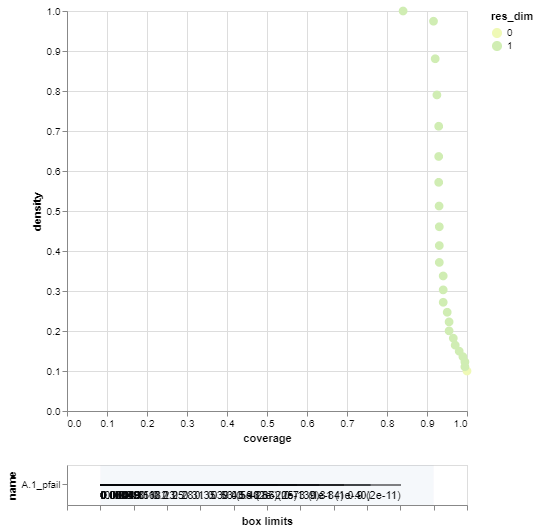

In [10]:
from ema_workbench.analysis import prim

outcomes_interest = outcomes_df['EAD'] > np.percentile(outcomes_df['EAD'],90)

prim_alg = prim.Prim(experiments, outcomes_interest, threshold=0.7, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.inspect_tradeoff()

coverage    0.84021
density           1
id               23
mass          0.084
mean              1
res_dim           1
Name: 23, dtype: object

             box 23                       
                min       max    qp values
A.1_pfail  0.000488  0.083984  [-1.0, 0.0]



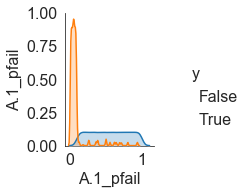

In [11]:
box1.inspect(23)
plt.show()

box1.select(23)
fig = box1.show_pairs_scatter()
plt.show()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 40000 points remaining, containing 4000 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.075, coverage: 0.75, density: 1.0 restricted_dimensions: 1


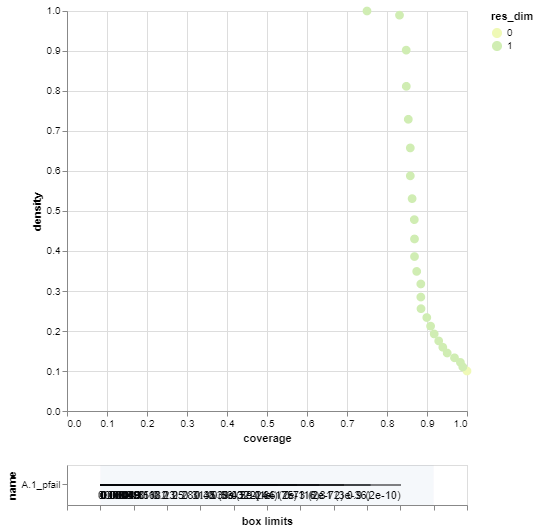

In [12]:
outcomes_interest = outcomes_df['END'] > np.percentile(outcomes_df['END'],90)
outcomes_interest

prim_alg = prim.Prim(experiments, outcomes_interest, threshold=0.7, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.inspect_tradeoff()

coverage     0.75
density         1
id             24
mass        0.075
mean            1
res_dim         1
Name: 24, dtype: object

             box 24                       
                min       max    qp values
A.1_pfail  0.000488  0.075439  [-1.0, 0.0]



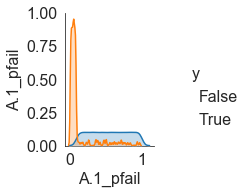

In [13]:
box1.inspect(24)
plt.show()

box1.select(24)
fig = box1.show_pairs_scatter()
plt.show()

In [14]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 37000 points remaining, containing 1000 cases of interest
[MainProcess/INFO] box does not meet threshold criteria, value is 0.17540060632308357, returning dump box


To see where the number of deaths occur, a density plot is made of all dike rings. Plotted in one graph

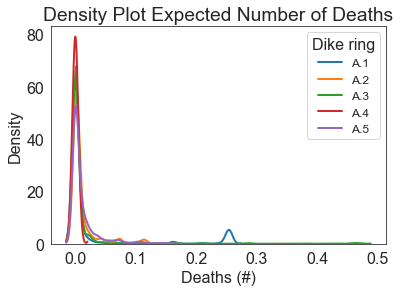

In [15]:
import seaborn as sns
sns.distplot(outcomes_df['A.1_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.1')
sns.distplot(outcomes_df['A.2_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.2')
sns.distplot(outcomes_df['A.3_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.3')
sns.distplot(outcomes_df['A.4_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.4')
sns.distplot(outcomes_df['A.5_Expected Number of Deaths'], hist = False, kde = True,
                 kde_kws = {'shade': False, 'linewidth': 2, 'bw': 0.005},
                 label = 'A.5')

plt.legend(prop={'size': 12}, title = 'Dike ring')
plt.title('Density Plot Expected Number of Deaths')
plt.xlabel('Deaths (#)')
plt.ylabel('Density')
if remakeimages:
    plt.savefig('export/images/density_deaths.png')

Now we seek for corrolation between the pfail and deaths/damage in the same dike ring using feature scoring

In [21]:
experiments.iloc[:,0:19]

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,A.4_Bmax,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,discount rate 2
0,29,60.93750,1.5,0.676758,119.68750,10.0,0.045898,317.81250,1.5,0.069336,57.18750,1.0,0.161133,152.81250,1.0,0.370117,3.5,2.5,4.5
1,96,60.93750,1.5,0.676758,119.68750,10.0,0.045898,317.81250,1.5,0.069336,57.18750,1.0,0.161133,152.81250,1.0,0.370117,3.5,2.5,4.5
2,29,197.18750,1.5,0.676758,119.68750,10.0,0.045898,317.81250,1.5,0.069336,57.18750,1.0,0.161133,152.81250,1.0,0.370117,3.5,2.5,4.5
3,29,60.93750,1.5,0.676758,119.68750,10.0,0.045898,317.81250,1.5,0.069336,57.18750,1.0,0.161133,152.81250,1.0,0.370117,3.5,2.5,4.5
4,29,60.93750,1.5,0.950195,119.68750,10.0,0.045898,317.81250,1.5,0.069336,57.18750,1.0,0.161133,152.81250,1.0,0.370117,3.5,2.5,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,69,259.53125,1.0,0.922363,328.28125,1.5,0.272949,116.09375,1.5,0.608887,190.46875,10.0,0.711426,338.90625,10.0,0.725098,1.5,3.5,2.5
39996,69,259.53125,1.0,0.922363,328.28125,1.5,0.272949,116.09375,1.5,0.608887,190.46875,10.0,0.711426,338.90625,10.0,0.887207,2.5,3.5,2.5
39997,69,259.53125,1.0,0.922363,328.28125,1.5,0.272949,116.09375,1.5,0.608887,190.46875,10.0,0.711426,338.90625,10.0,0.887207,1.5,2.5,2.5
39998,69,259.53125,1.0,0.922363,328.28125,1.5,0.272949,116.09375,1.5,0.608887,190.46875,10.0,0.711426,338.90625,10.0,0.887207,1.5,3.5,3.5


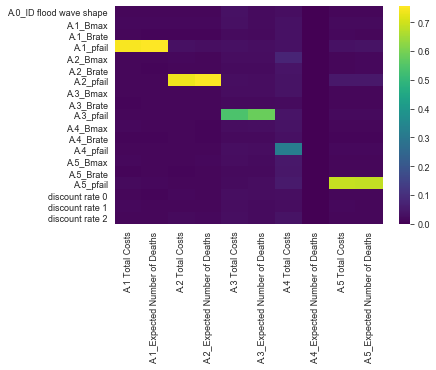

In [25]:
from ema_workbench.analysis import feature_scoring

x = experiments.iloc[:,0:19]
y = outcomes_df.iloc[:,9:]

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=False)
plt.rc('font', size=6) 
if remakeimages:
    plt.savefig('export/images/scoring.png')
plt.show()

Because the Pfail is that dominant. Both the PRIM and feature scoring is run again to seek for other major corrolation

[MainProcess/INFO] 40000 points remaining, containing 8000 cases of interest
[MainProcess/INFO] mean: 0.35043988269794724, mass: 0.05115, coverage: 0.089625, density: 0.35043988269794724 restricted_dimensions: 9


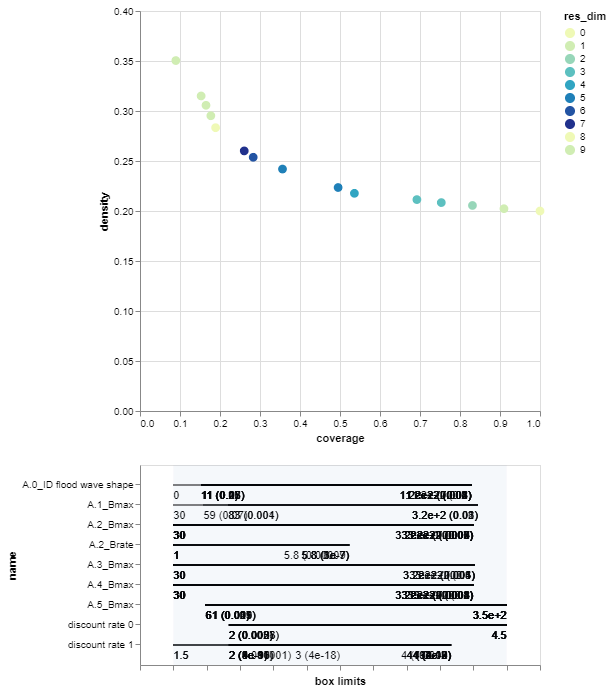

In [20]:
experiments_no_pfail = experiments.iloc[:,[0,1,2,4,5,7,8,10,11,13,14,16,17,18]]

outcomes_interest = outcomes_df['END'] > np.percentile(outcomes_df['END'],80)
outcomes_interest

prim_alg = prim.Prim(experiments_no_pfail, outcomes_interest, threshold=0.3, peel_alpha=0.1)
box1 = prim_alg.find_box()
box1.inspect_tradeoff()

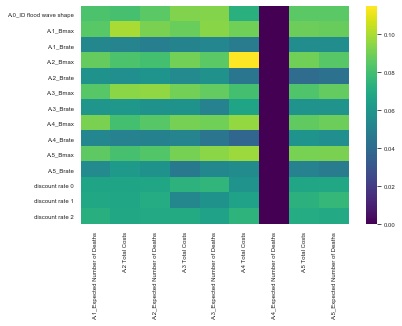

In [27]:
x = experiments_no_pfail
y = outcomes_df.iloc[:,10:]

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=False)
plt.rc('font', size=10) 
if remakeimages:
    plt.savefig('export/images/scoring_no_pfail.png')
plt.show()